In [1]:
from fastai  import  *
from fastai.vision import *

In [20]:
import os

In [21]:
path=os.chdir('/content/drive/MyDrive')

In [22]:
path=Path.cwd()

In [23]:
path

PosixPath('/content/drive/MyDrive')

In [24]:
path=path/'flowers'
path.ls()

[PosixPath('/content/drive/MyDrive/flowers/daisy'),
 PosixPath('/content/drive/MyDrive/flowers/tulip'),
 PosixPath('/content/drive/MyDrive/flowers/dandelion'),
 PosixPath('/content/drive/MyDrive/flowers/rose'),
 PosixPath('/content/drive/MyDrive/flowers/sunflower')]

In [25]:
data=ImageDataBunch.from_folder(path,train='.',valid_pct=0.2, ds_tfms=get_transforms(),size=224)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3454 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
daisy,daisy,daisy,daisy,daisy
Path: /content/drive/MyDrive/flowers;

Valid: LabelList (863 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sunflower,dandelion,daisy,sunflower,dandelion
Path: /content/drive/MyDrive/flowers;

Test: None

In [29]:
learner=cnn_learner(data,models.resnet18, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [30]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [75]:
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.131553,0.302255,0.910776,0.089224,00:52
1,0.363429,0.839718,0.789108,0.210892,00:52
2,0.514446,0.463520,0.867903,0.132097,00:52
3,0.438756,0.366280,0.878331,0.121669,00:52
4,0.346692,0.275891,0.903824,0.096176,00:52
5,0.265382,0.234817,0.922364,0.077636,00:52
6,0.217909,0.231533,0.931634,0.068366,00:52
7,0.174615,0.221388,0.933951,0.066049,00:52


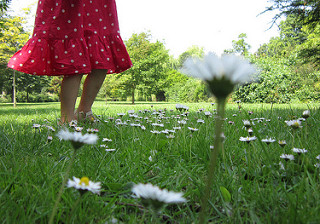

In [76]:
i=open_image('/content/drive/MyDrive/flowers/daisy/10391248763_1d16681106_n.jpg')
i

In [77]:
what,_,probs =learner.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a daisy!
Probability it's a daisy: 0.001283


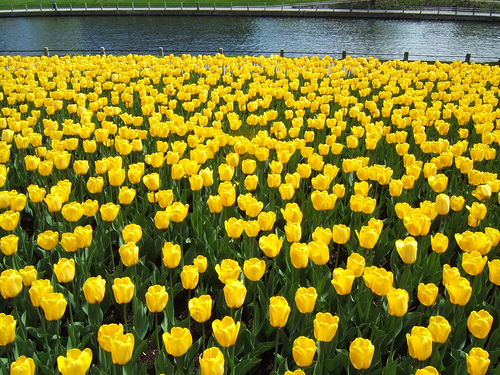

In [79]:
i=open_image('/content/drive/MyDrive/flowers/tulip/142235914_5419ff8a4a.jpg')
i

In [80]:
what,_,probs =learner.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a tulip!
Probability it's a tulip: 0.002530


In [81]:
interp = ClassificationInterpretation.from_learner(learner)

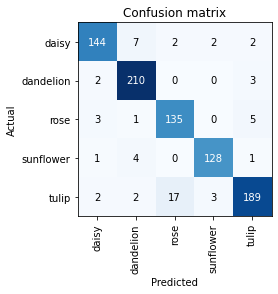

In [82]:
interp.plot_confusion_matrix()